<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-机器学习算法库-:-scikit-learn" data-toc-modified-id="Python-机器学习算法库-:-scikit-learn-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python 机器学习算法库 : scikit-learn</a></span></li><li><span><a href="#以手写数字识别为例" data-toc-modified-id="以手写数字识别为例-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>以手写数字识别为例</a></span><ul class="toc-item"><li><span><a href="#加载工具包" data-toc-modified-id="加载工具包-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>加载工具包</a></span></li><li><span><a href="#准备数据" data-toc-modified-id="准备数据-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>准备数据</a></span></li><li><span><a href="#创建支持向量分类器" data-toc-modified-id="创建支持向量分类器-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>创建支持向量分类器</a></span></li><li><span><a href="#训练" data-toc-modified-id="训练-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>训练</a></span></li><li><span><a href="#预测" data-toc-modified-id="预测-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>预测</a></span></li><li><span><a href="#输出结果" data-toc-modified-id="输出结果-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>输出结果</a></span></li></ul></li><li><span><a href="#应用举例" data-toc-modified-id="应用举例-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>应用举例</a></span></li></ul></div>

# Python 机器学习算法库 : scikit-learn

Machine Learning in Python: http://scikit-learn.org/stable/
<img src="./sklearn.png" width = "800"  align=center >
<center>图1. scikit-learn 界面 </center>


# 以手写数字识别为例

这是使用`sklearn`进行手写数字识别的例子. 参见 http://scikit-learn.org/stable/tutorial/index.html

## 加载工具包

In [3]:
# 加载画图工具包
import matplotlib.pyplot as plt
%matplotlib inline
# 加载sklearn相关工具包
from sklearn import datasets, svm, metrics


## 准备数据

+ 本数据集由1797组8x8的手写数字图像组成
+ images 按矩阵方式存储图片
+ target 图片标签，即图片所表示的真实数字


In [4]:
# 导入数据
digits = datasets.load_digits()

In [5]:
# 查看数据
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

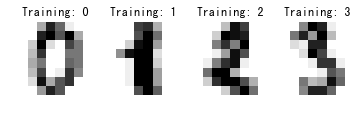

In [7]:
# 查看前四组图像
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [8]:
# 将图像数据转换为向量存储
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

## 创建支持向量分类器

In [9]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

## 训练

In [10]:
# 利用前一半数据进行训练
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 预测

In [11]:
# 对后半组数据进行预测
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

## 输出结果

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1 

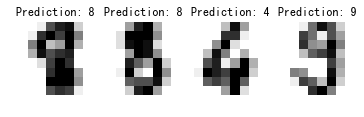

In [12]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

# 应用举例

In [13]:
import numpy as np
from PIL import Image
import scipy
import cv2
from fractions import Fraction
import warnings
warnings.filterwarnings('ignore')

In [14]:
# 定义图像转换函数
# 通过转换使使图像数据符合训练数据的特征规格
def image2Digit(image):
    im_resized = scipy.misc.imresize(image, (8,8)) # 调整为8*8大小
    im_gray = cv2.cvtColor(im_resized, cv2.COLOR_BGR2GRAY) # RGB（三维）转为灰度图（一维）
    im_hex = Fraction(16,255) * im_gray # 将像素值调整为0-16之间
    im_reverse = 16 - im_hex # 将图片数据反相
    return im_reverse.astype(np.int)

[[0 0 1 3 1 0 0 0]
 [0 0 1 1 3 1 0 0]
 [0 0 0 0 2 2 0 0]
 [0 0 0 1 3 0 0 0]
 [0 0 1 3 1 0 0 0]
 [0 0 5 4 3 3 1 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


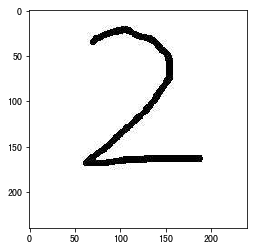

In [15]:
# 读取单张自定义手写数字的图片
image = scipy.misc.imread('two-1.jpeg')
# 将图片转为digits训练数据的规格——即统一数据表征方式
im_reverse = image2Digit(image)

# 查看图片
plt.imshow(image)
print(im_reverse)

In [16]:
# 查看预测结果
reshaped = im_reverse.reshape(1,64) # 8*8转为1*64（预测方法的参数要求）
result = classifier.predict(reshaped)
print(result)

[7]


[[ 0  2  8 11 11  7  1  0]
 [ 3 12 13  9 10 14  7  0]
 [11 12  2  0  0 11 11  0]
 [ 6  4  0  0  6 14  7  0]
 [ 0  0  2  8 14 10  1  0]
 [ 1  5 12 15 10  6  5  3]
 [10 15 16 15 15 15 15 12]
 [ 8 14 14 13 11  9  7  3]]


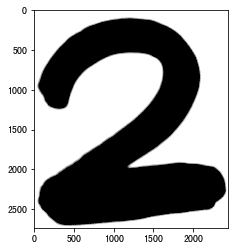

In [17]:
image = scipy.misc.imread('two-2.png') # 读取单张自定义手写数字的图片
im_reverse = image2Digit(image) # 将图片转为digits训练数据的规格——即数据的表征方式要统一
plt.imshow(image)
print(im_reverse) # 显示图片转换后的像素值

In [18]:
# 查看预测结果
reshaped = im_reverse.reshape(1,64) # 8*8转为1*64（预测方法的参数要求）
result = classifier.predict(reshaped)
print(result)

[2]


[[ 0  0  0  0  3  4  0  0]
 [ 0  0  5 10 12 11  0  0]
 [ 0  1  8  4  9  8  0  0]
 [ 0  0  0  1 11  5  0  0]
 [ 0  0  0  3 12  2  0  0]
 [ 0  0  0  4 11  0  0  0]
 [ 0  0  0  6  8  0  0  0]
 [ 0  0  0  5  5  0  0  0]]


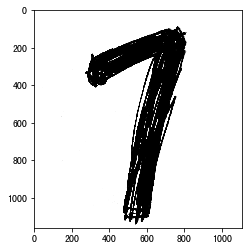

In [19]:
image = scipy.misc.imread('seven-1.png') # 读取单张自定义手写数字的图片
im_reverse = image2Digit(image) # 将图片转为digits训练数据的规格——即数据的表征方式要统一
plt.imshow(image)
print(im_reverse) # 显示图片转换后的像素值

In [20]:
# 查看预测结果
reshaped = im_reverse.reshape(1,64) # 8*8转为1*64（预测方法的参数要求）
result = classifier.predict(reshaped)
print(result)

[7]


[[ 0  5 13 13 13 13 12  3]
 [ 0  8 13 12 13 15 13  2]
 [ 0  1  1  1 11 15  7  0]
 [ 0  0  0  6 15 12  1  0]
 [ 0  0  1 12 15  5  0  0]
 [ 0  0  5 15 12  1  0  0]
 [ 0  0 10 15  6  0  0  0]
 [ 0  0  7  9  1  0  0  0]]


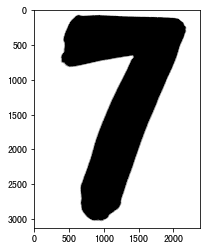

In [21]:
image = scipy.misc.imread('seven-2.png') # 读取单张自定义手写数字的图片
im_reverse = image2Digit(image) # 将图片转为digits训练数据的规格——即数据的表征方式要统一
plt.imshow(image)
print(im_reverse) # 显示图片转换后的像素值

In [22]:
# 查看预测结果
reshaped = im_reverse.reshape(1,64) # 8*8转为1*64（预测方法的参数要求）
result = classifier.predict(reshaped)
print(result)

[7]
